In [95]:
from scipy.io import arff
import pandas as pd
from sklearn.feature_selection import f_classif

data = arff.loadarff('diabetes.arff')

df = pd.DataFrame(data[0])

# separar features do outcome
x = df.drop(columns=['Outcome'])
y = df['Outcome'].str.decode('utf-8')

# calcular F-values
F_value = f_classif(x, y)[0]

# criar dataframe com features ordenadas pelo F-value
df_results = pd.DataFrame({'Feature': x.columns, 'F-Value': F_value})
df_results.sort_values(by='F-Value', ascending=False, inplace=True)

print(df_results)


                    Feature     F-Value
1                   Glucose  213.161752
5                       BMI   71.772072
7                       Age   46.140611
0               Pregnancies   39.670227
6  DiabetesPedigreeFunction   23.871300
4                   Insulin   13.281108
3             SkinThickness    4.304381
2             BloodPressure    3.256950


1- Variável com maior poder disccriminativo: Glucose
   Variável com menor poder descriminativo: BloodPressure

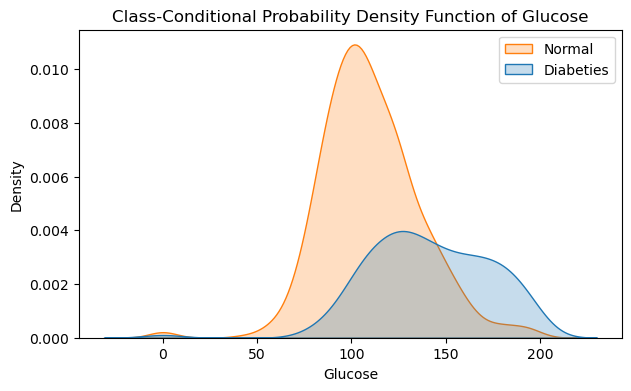

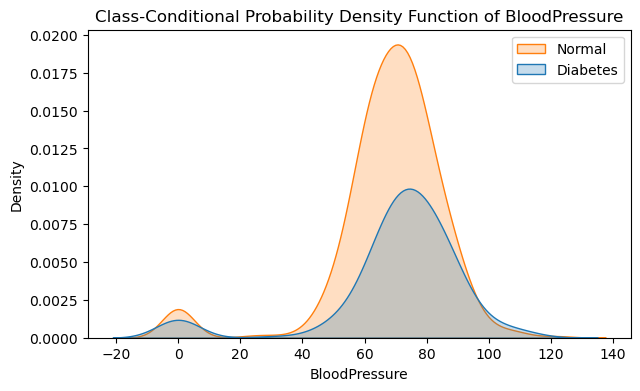

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

best_discriminative_power = df_results.iloc[0]['Feature']
worst_discriminative_power = df_results.iloc[-1]['Feature']


#density function of the best discriminative power variable
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x=best_discriminative_power, hue='Outcome', fill= True)
plt.title(f'Class-Conditional Probability Density Function of {best_discriminative_power}')
plt.xlabel(best_discriminative_power)
plt.ylabel('Density')
plt.legend(labels=['Normal', 'Diabeties'])

plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x=worst_discriminative_power, hue='Outcome', fill= True)
plt.title(f'Class-Conditional Probability Density Function of {worst_discriminative_power}')
plt.xlabel(worst_discriminative_power)
plt.ylabel('Density')
plt.legend(labels=['Normal', 'Diabetes'])

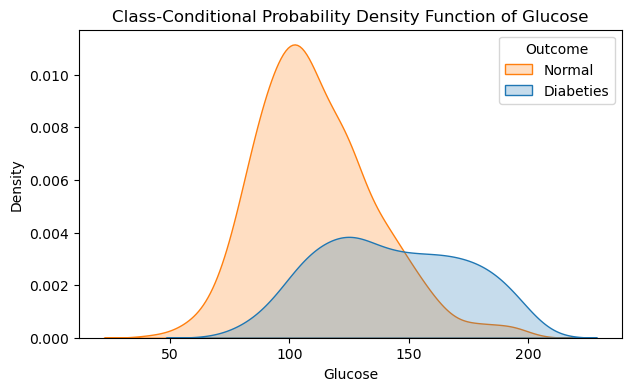

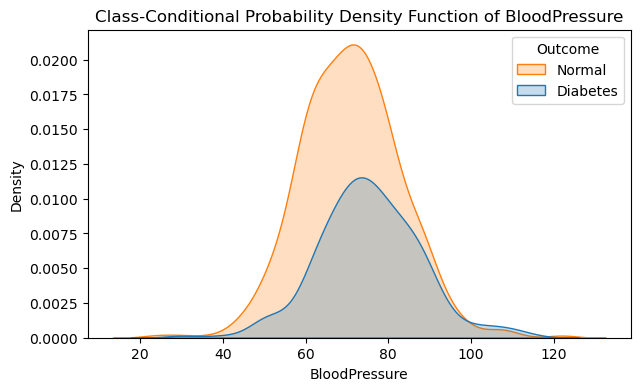

In [97]:
df = df[(df['BloodPressure'] > 0) & (df['Glucose'] > 0)]

plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x=best_discriminative_power, hue='Outcome', fill= True)
plt.title(f'Class-Conditional Probability Density Function of {best_discriminative_power}')
plt.xlabel(best_discriminative_power)
plt.ylabel('Density')
plt.legend(title='Outcome', labels=['Normal', 'Diabeties'])

plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x=worst_discriminative_power, hue='Outcome', fill= True)
plt.title(f'Class-Conditional Probability Density Function of {worst_discriminative_power}')
plt.xlabel(worst_discriminative_power)
plt.ylabel('Density')
plt.legend(title='Outcome', labels=['Normal', 'Diabetes'])

2-

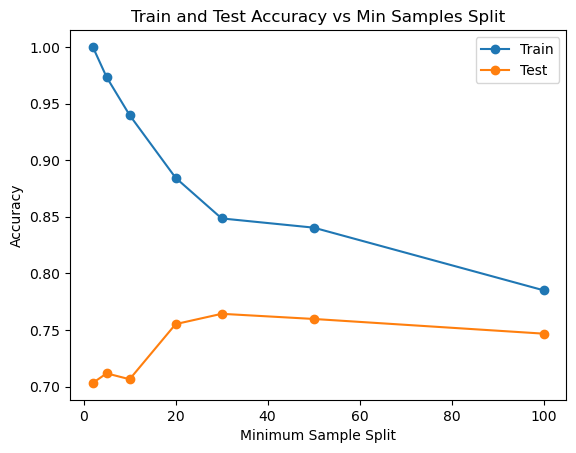

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

num_runs = 10
min_sample_splits = [2, 5, 10, 20, 30, 50, 100]

train_accuracies = []
test_accuracies = []

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)

for min_sample_split in min_sample_splits:
  sum_train_accuracies = 0
  sum_test_accuracies = 0

  for _ in range(num_runs):    
    classifier = DecisionTreeClassifier(min_samples_split=min_sample_split)
    
    classifier.fit(x_train, y_train)
    
    y_train_predictions = classifier.predict(x_train)
    y_test_predictions = classifier.predict(x_test)

    sum_train_accuracies += accuracy_score(y_train, y_train_predictions)
    sum_test_accuracies += accuracy_score(y_test, y_test_predictions)

  train_accuracies.append(sum_train_accuracies/num_runs)
  test_accuracies.append(sum_test_accuracies/num_runs)


# Plotar as precisões com as barras de erro (desvio padrão)
plt.plot(min_sample_splits, train_accuracies, label='Train', marker='o')
plt.plot(min_sample_splits, test_accuracies, label='Test', marker='o')

plt.xlabel('Minimum Sample Split')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Min Samples Split')
plt.legend()
